# **Punto 1**



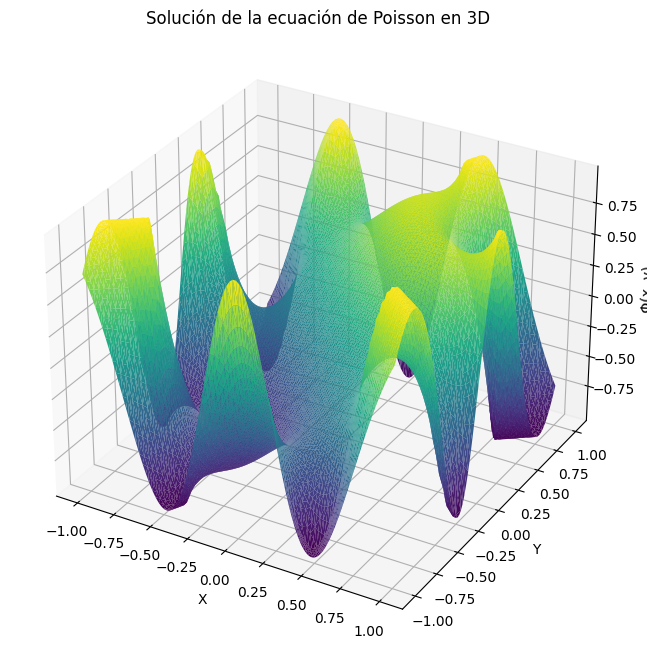

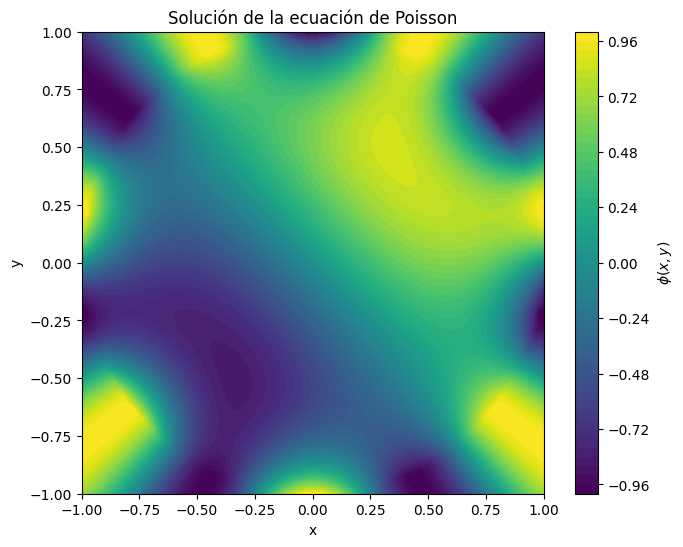

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
puntos = 100  # Tamaño de la malla
radio = 1.0
delta = 2 * radio / (puntos - 1)
T_c = 5e-5
iteraciones_max = 15000

# Malla de puntos
x = np.linspace(-radio, radio, puntos)
y = np.linspace(-radio, radio, puntos)
X, Y = np.meshgrid(x, y)

# Inicialización
phi = np.zeros((puntos, puntos))
densidad_c = -(X + Y)
mask = X**2 + Y**2 < radio**2

# Condición de frontera
theta = np.arctan2(Y, X)
phi_borde = np.sin(7 * theta)
phi[~mask] = phi_borde[~mask]  # Condición en el borde

# Aplicar valores aleatorios en el interior del círculo
phi[mask] = np.random.rand(np.sum(mask))

# Iteración de Jacobi
for _ in range(iteraciones_max):
    phi_old = phi.copy()

    # Aplicar la fórmula de diferencias finitas
    phi[1:-1, 1:-1] = 0.25 * (phi_old[2:, 1:-1] + phi_old[:-2, 1:-1] +
                               phi_old[1:-1, 2:] + phi_old[1:-1, :-2] -
                               delta**2 * 4*np.pi*densidad_c[1:-1, 1:-1])

    # Aplicar condiciones de frontera
    phi[~mask] = phi_borde[~mask]

    # Verificar convergencia
    diferencia = np.abs(phi - phi_old)
    if np.trace(diferencia) < T_c:
        print(f"Convergencia alcanzada después de {_} iteraciones.")
        break

# Visualización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = phi.flatten()

# Crear un gráfico 3D
ax.plot_trisurf(X_flat, Y_flat, Z_flat, cmap='viridis', edgecolor='none')

# Ajustar los límites y etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Φ(x, y)')
ax.set_title('Solución de la ecuación de Poisson en 3D')

plt.show()

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, levels=50, cmap='viridis')
plt.colorbar(label=r'$\phi(x, y)$')
plt.title('Solución de la ecuación de Poisson')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Función para actualizar la vista en cada frame
def actualizar(frame):
    ax.clear()
    ax.plot_trisurf(X_flat, Y_flat, Z_flat, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Φ(x, y)')
    ax.set_title('Solución de la ecuación de Poisson en 3D')
    ax.view_init(elev=30, azim=frame)

# Crear la animación
anim = FuncAnimation(fig, actualizar, frames=np.arange(0, 360, 2), interval=50)

# Guardar la animación como un archivo de video
anim.save('poisson_rotacion.mp4', writer='ffmpeg')

In [ ]:
from IPython.display import Video
Video("poisson_rotacion.mp4", embed=True)

**Punto 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#discretización:
L = 2
T = 2
Nx = 100
Nt = 500
dx = L/(Nx-1)
c = 1.0
dt = 0.9*dx/c
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)


#condición inicial:
u0 = np.exp(-125*(x-0.5)**2)

#condiciones de frontera:
def dirichlet(u):
    u[0] = 0
    u[-1] = 0
    return u

def neumann(u):
    u[0] = u[1]
    u[-1] = u[-2]
    return u

def periodic(u):
    u[0] = u[-2]
    u[-1] = u[1]
    return u
#PDE
def funcion_onda (u0, condicion_frontera, Nt):
  u = np.zeros((Nt, Nx))
  u[0] = u0

  u[1] = u[0] + dt**2 * c**2 / 2 * (np.roll(u[0], -1) - 2*u[0] + np.roll(u[0], 1)) / dx**2
  u[1] = condicion_frontera(u[1])
  for n in range(1, Nt-1):
      u[n+1] = 2*u[n] - u[n-1] + dt**2 * c**2 * (np.roll(u[n], -1) - 2*u[n] + np.roll(u[n], 1)) / dx**2
      u[n+1] = condicion_frontera(u[n+1])
  return u

u_dirichlet = funcion_onda(u0, dirichlet, Nt)
u_neumann = funcion_onda(u0, neumann, Nt)
u_periodic = funcion_onda(u0, periodic, Nt)

In [ ]:
fig, axs = plt.subplots(3, 1)

for ax in axs:
    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(-1.1, 1.1)

axs[0].set_title('Dirichlet')
axs[1].set_title('Neumann')
axs[2].set_title('Periódicas')

line_dirichlet, = axs[0].plot(x, u_dirichlet[0], color='b')
line_neumann, = axs[1].plot(x, u_neumann[0], color='r')
line_periodic, = axs[2].plot(x, u_periodic[0], color='g')

plt.tight_layout()

def draw_frame(frame):
    line_dirichlet.set_ydata(u_dirichlet[frame])
    line_neumann.set_ydata(u_neumann[frame])
    line_periodic.set_ydata(u_periodic[frame])
    return line_dirichlet, line_neumann, line_periodic

anim = animation.FuncAnimation(fig, draw_frame, frames=range(0, Nt, 2), interval=100, blit=True)
plt.close(fig)

In [ ]:
anim.save('onda_condiciones_frontera.mp4')

In [ ]:
from IPython.display import Video
Video("poisson_rotacion.mp4", embed=True)

**En el tiempo suficiente para dejar que las ondas interactúen con la frontera. Comente qué comportamiento se observa en cada caso e interprete físicamente qué significa.**
Observamos un comportamiento característico para cada onda. En el caso de Dirichlet, observamos que las ondas cuando rebotan en las paredes cambian de orientación (positiva y negativa), por lo que a veces la onda tiene amplitud positiva o negativa. Para las ondas de Neumann, tenemos que cuando las ondas rebotan en las paredes, el sentido de la amplitud de la onda no cambia, en consecuencia, la onda es siempre positiva. Finalmente, la onda periódica la podemos imaginar como si "la cola y la cabeza" de la onda estuviesen conectadas. En este caso la onda es siempre positiva y las ondas se suman siempre en los mismos puntos.

**También comente sobre el coeficiente de Courant (𝐶 = 𝑐𝛿𝑡/𝛿𝑥
) usado en su simulación.**
El coeficiente de courant debe ser menor o igual a uno para que la función converja. De lo contrario, la función diverge y el modelo de diferencias finitas deja de funcionar.


# **Punto 3**

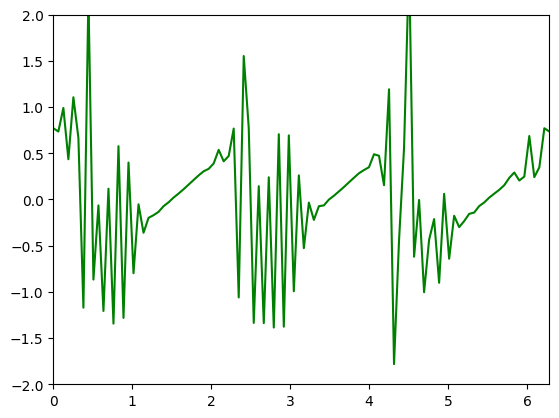

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

alpha = 0.022
longitud = 2.0*np.pi
tiempo = 10.0
num_puntos = 100
num_tiempos = 1000
dx = longitud / num_puntos
dt = 0.001
num_pasos = int(tiempo / dt)

x = np.linspace(0, longitud, num_puntos)


phi = np.cos(np.pi * x)
phi_old = np.copy(phi)


def frontera(phi):
    phi[0] = phi[-2]
    phi[-1] = phi[1]
    return phi

def phi_evolve(phi, phi_old, dx, dt, alpha):
    phi_nuevo = np.copy(phi)
    for i in range(1, len(phi) - 2):
        phi_nuevo[i] = (
            phi_old[i]
            - dt * (
                (phi[i+1] + phi[i] + phi[i-1]) * (phi[i+1] - phi[i-1]) / (3 * dx)
                + alpha**2 * (phi[i+2] - 2 * phi[i+1] + 2 * phi[i-1] - phi[i-2]) / (dx**3)
            )
        )
    phi_nuevo = frontera(phi_nuevo)
    return phi_nuevo


fig, ax = plt.subplots()
ax.set_xlim(0, longitud)
ax.set_ylim(-2, 2)
line, = ax.plot(x, phi, color="green")


def animate(i):
    global phi, phi_old
    phi_siguiente = phi_evolve(phi, phi_old, dx, dt, alpha)
    phi_old = np.copy(phi)
    phi = np.copy(phi_siguiente)
    line.set_ydata(phi)
    return line,

# Creación de la animación
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=30, blit=True)


#ani.save('simulacion.gif', writer='imagemagick', fps=50)
ani.save('simulacion.mp4', writer='ffmpeg', fps=50)
plt.close(fig)

¿Qué pasa si aumenta o disminuye el valor de 𝛼?

Al aumentar el valor de 𝛼, las ondas se dispersan más rápidamente, lo que suaviza las oscilaciones y reduce la cantidad de picos en la solución. Además, se atenúan las amplitudes de las ondas debido a una mayor pérdida de energía por la dispersión. Por otro lado, al disminuir 𝛼, la dispersión es menor, lo que permite que las ondas se mantengan más concentradas y que los efectos no lineales, como la formación de solitones, sean más evidentes. En este caso, la interacción entre las ondas se intensifica, generando estructuras más complejas y persistentes en el sistema.

In [4]:
from IPython.display import Video
Video("simulacion.mp4", embed=True)

# **Punto 4**

In [ ]:
np.diff(x).mean()

0.020202020202020204

In [ ]:
dt/dx*c

0.2475

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
c = 0.5  # Velocidad de la onda
Lx = 2.0  # Longitud del dominio en x
Ly = 1.0  # Ancho del dominio en y
Nx = 100  # Número de puntos en x
Ny = 50   # Número de puntos en y
dx = Lx / (Nx - 1)  # Tamaño del paso en x
dy = Ly / (Ny - 1)  # Tamaño del paso en y
dt = 0.01  # Tamaño del paso en tiempo
T = 4.0  # Tiempo total de simulación
Nt = int(T / dt)  # Número de pasos en el tiempo

# Inicialización
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
u = np.zeros((Ny, Nx))
u_prev = np.zeros((Ny, Nx))
u_next = np.zeros((Ny, Nx))

# Condición inicial
u = 2 * np.exp(-150 * ((X - 2/5)**2 + (Y - 1/2)**2))

# Obstáculo: pared y rendija
wall_x_min = int(round((1 - 0.01) / dx))
wall_x_max = int(round((1 + 0.01) / dx))
slit_y_min = int(round((1/2 - 0.08) / dy))
slit_y_max = int(round((1/2 + 0.08) / dy))

def apply_boundaries(u):
    u[:, 0] = 0  # Frontera izquierda
    u[:, -1] = 0  # Frontera derecha
    u[0, :] = 0  # Frontera inferior
    u[-1, :] = 0  # Frontera superior

    # Rendija: se actualiza solo la sección vertical en la pared
    u[0:slit_y_min, wall_x_min:wall_x_max] = 0
    u[slit_y_max:-1, wall_x_min:wall_x_max] = 0

    return u

def update(u, u_prev, dx, dy, dt, c):
    u_next = 2 * u - u_prev + (c * dt / dx)**2 * (
        np.roll(u, -1, axis=1) - 2 * u + np.roll(u, 1, axis=1) +
        np.roll(u, -1, axis=0) - 2 * u + np.roll(u, 1, axis=0)
    )
    u_next = apply_boundaries(u_next)
    return u_next

# Configuración de la figura para la animación
fig, ax = plt.subplots()
cax = ax.imshow(u, cmap='Spectral', interpolation='bilinear', vmin=-7, vmax=7)
ax.set_title('Simulación de la ecuación de onda en 2D')

def animate(i):
    global u, u_prev
    u_next = update(u, u_prev, dx, dy, dt, c)
    u_prev, u = u, apply_boundaries(u_next)
    u_show = u.copy()
    u_show[0:slit_y_min, wall_x_min:wall_x_max] = np.nan
    u_show[slit_y_max:-1, wall_x_min:wall_x_max] = np.nan
    cax.set_data(u_show)
    return cax,

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=dt*1000, blit=True)

# Guardar la animación como video
ani.save('wave_simulation_dirichlet.mp4', writer='ffmpeg', fps=30)

plt.close(fig)

In [ ]:
from IPython.display import Video
Video("wave_simulation_dirichlet.mp4", embed=True)

In [ ]:
u[0:slit_y_min, wall_x_min:wall_x_max] = np.nan
u[slit_y_max:-1, wall_x_min:wall_x_max] = np.nan

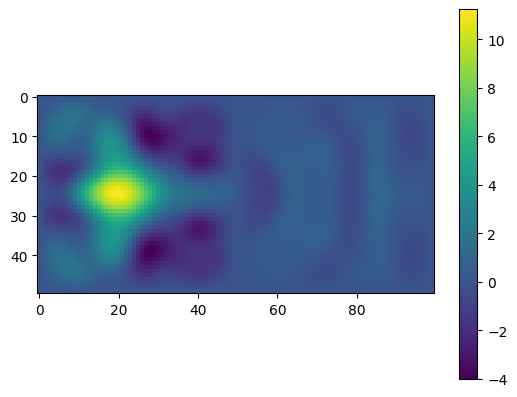

In [ ]:
p = plt.imshow(u)
plt.colorbar(p)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
c = 0.5  # Velocidad de la onda
Lx = 2.0  # Longitud del dominio en x
Ly = 1.0  # Ancho del dominio en y
Nx = 100  # Número de puntos en x
Ny = 50   # Número de puntos en y
dx = Lx / (Nx - 1)  # Tamaño del paso en x
dy = Ly / (Ny - 1)  # Tamaño del paso en y
dt = 0.01  # Tamaño del paso en tiempo
T = 4.0  # Tiempo total de simulación
Nt = int(T / dt)  # Número de pasos en el tiempo

# Inicialización
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
u = np.zeros((Ny, Nx))
u_prev = np.zeros((Ny, Nx))
u_next = np.zeros((Ny, Nx))

# Condición inicial (gaussiana centrada)
u = 2 * np.exp(-150 * ((X - 2/5)**2 + (Y - 1/2)**2))

# Obstáculo: pared y rendijas
wx = 0.02  # Ancho de la pared en x
wy = 0.16  # Ancho de las rendijas en y

# Índices para la pared en x (ubicada en x = 1 m)
wall_x_min = int(1 / dx)
wall_x_max = int((1 + wx) / dx)

# Índices para las rendijas en y
slit1_y_min = int((1/3 - wy/2) / dy)  # Rendija inferior
slit1_y_max = int((1/3 + wy/2) / dy)

slit2_y_min = int((2/3 - wy/2) / dy)  # Rendija superior
slit2_y_max = int((2/3 + wy/2) / dy)

def apply_boundaries_neumann(u):
    # Aplicar condiciones de frontera Neumann: derivada normal = 0
    # Frontera izquierda (Neumann: derivada respecto a x = 0)
    u[:, 0] = u[:, 1]
    # Frontera derecha (Neumann)
    u[:, -1] = u[:, -2]
    # Frontera inferior (Neumann: derivada respecto a y = 0)
    u[0, :] = u[1, :]
    # Frontera superior (Neumann)
    u[-1, :] = u[-2, :]

    # Aplicar condición de rendija en la pared (valores 0 en la pared excepto las rendijas)
    u[:, wall_x_min:wall_x_max] = 0  # Toda la pared inicialmente bloquea el paso

    # Abrir las rendijas
    u[slit1_y_min:slit1_y_max, wall_x_min:wall_x_max] = u[slit1_y_min:slit1_y_max, wall_x_min-1:wall_x_min]  # Rendija inferior
    u[slit2_y_min:slit2_y_max, wall_x_min:wall_x_max] = u[slit2_y_min:slit2_y_max, wall_x_min-1:wall_x_min]  # Rendija superior

    return u

def update(u, u_prev, dx, dy, dt, c):
    u_next = 2 * u - u_prev + (c * dt / dx)**2 * (
        np.roll(u, -1, axis=1) - 2 * u + np.roll(u, 1, axis=1) +
        np.roll(u, -1, axis=0) - 2 * u + np.roll(u, 1, axis=0)
    )
    return u_next

# Configuración de la figura para la animación
fig, ax = plt.subplots()
cax = ax.imshow(u, cmap='viridis', interpolation='bilinear', animated=True)
ax.set_title('Simulación de la ecuación de onda en 2D con pared y rendijas')

def animate(i):
    global u, u_prev
    u_next = update(u, u_prev, dx, dy, dt, c)
    u_prev, u = u, apply_boundaries_neumann(u_next)

    # Ajustar la escala de color automáticamente
    cax.set_data(u)
    cax.set_clim(np.min(u), np.max(u))
    return cax,

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=dt*1000, blit=True)

# Guardar la animación como video
ani.save('wave_simulation_neumann_with_slits.mp4', writer='ffmpeg', fps=30)

plt.close(fig)



In [ ]:
from IPython.display import Video
Video("wave_simulation_neumann_with_slits.mp4", embed=True)